In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_list = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')

In [3]:
with_mask_list[0:5]

['with_mask_3326.jpg',
 'with_mask_3139.jpg',
 'with_mask_696.jpg',
 'with_mask_2867.jpg',
 'with_mask_39.jpg']

In [4]:
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')

In [5]:
without_mask_files[0:5]

['without_mask_3248.jpg',
 'without_mask_2803.jpg',
 'without_mask_650.jpg',
 'without_mask_2060.jpg',
 'without_mask_559.jpg']

In [6]:
len(without_mask_files), len(with_mask_list)

(3828, 3725)

Creating Lables for the two class of images


with mask = 1 
without mask = 0

In [7]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [8]:
print(with_mask_labels[0:10])
print(without_mask_labels[0:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Display the images

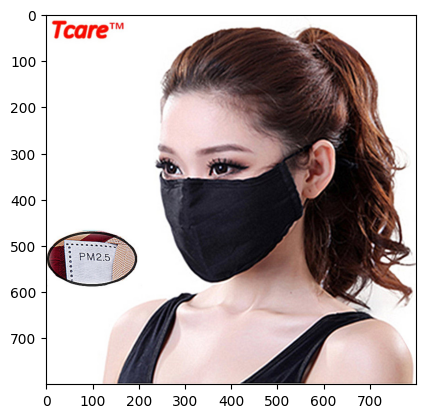

In [10]:
# displating with mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3326.jpg')
imgplot = plt.imshow(img)
plt.show()

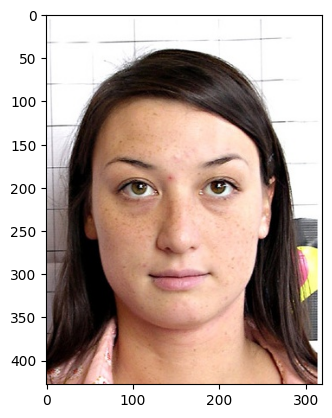

In [11]:
# displating without mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize image
2. Convert imager to numpy array

In [12]:
# convert with mask images to numpy array

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_list:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
# convert wothout mask images to numpy array 

without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

In [14]:
len(data)

7553

In [15]:
data[0].shape

(128, 128, 3)

In [16]:
type(data[0])

numpy.ndarray

In [17]:
# converting imge list and label list to numpy arrays


X = np.array(data)
y = np.array(labels)

In [18]:
X.shape, y.shape

((7553, 128, 128, 3), (7553,))

In [19]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

Split data to train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3), (6042,), (1511,))

In [22]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled[0]

array([[[0.89411765, 0.92941176, 0.9254902 ],
        [0.89411765, 0.92941176, 0.9254902 ],
        [0.89411765, 0.92941176, 0.9254902 ],
        ...,
        [0.66666667, 0.70980392, 0.67843137],
        [0.67058824, 0.71372549, 0.68235294],
        [0.6745098 , 0.71764706, 0.68627451]],

       [[0.87843137, 0.91372549, 0.90980392],
        [0.88235294, 0.91764706, 0.91372549],
        [0.88627451, 0.92156863, 0.91764706],
        ...,
        [0.6       , 0.64313725, 0.61176471],
        [0.60392157, 0.64705882, 0.61568627],
        [0.60784314, 0.65098039, 0.61960784]],

       [[0.84705882, 0.88235294, 0.87843137],
        [0.85490196, 0.89019608, 0.88627451],
        [0.87058824, 0.90588235, 0.90196078],
        ...,
        [0.60392157, 0.64705882, 0.61176471],
        [0.60392157, 0.64705882, 0.61176471],
        [0.60784314, 0.65098039, 0.61568627]],

       ...,

       [[0.76862745, 0.78823529, 0.70196078],
        [0.76862745, 0.78823529, 0.70196078],
        [0.76862745, 0

Building a Conventuional Neural Network

In [24]:
import tensorflow as tf
from tensorflow import keras

2024-05-15 07:14:28.955252: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 07:14:28.955414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 07:14:29.139515: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
num_of_classes = 2 

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128, 3)))

model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0,5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0,5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))




/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
# COmpile the model network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [27]:
# Training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 61s 392ms/step - acc: 0.7393 - loss: 0.9781 - val_acc: 0.8561 - val_loss: 0.4052
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 395ms/step - acc: 0.9015 - loss: 0.2541 - val_acc: 0.8983 - val_loss: 0.2259
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 81s 390ms/step - acc: 0.9570 - loss: 0.1291 - val_acc: 0.9115 - val_loss: 0.2314
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 392ms/step - acc: 0.9740 - loss: 0.0740 - val_acc: 0.8867 - val_loss: 0.3317
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 395ms/step - acc: 0.9850 - loss: 0.0519 - val_acc: 0.9090 - val_loss: 0.3441


Model Evaluation

In [28]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - acc: 0.9146 - loss: 0.3039
Test accuracy = 0.9106552004814148


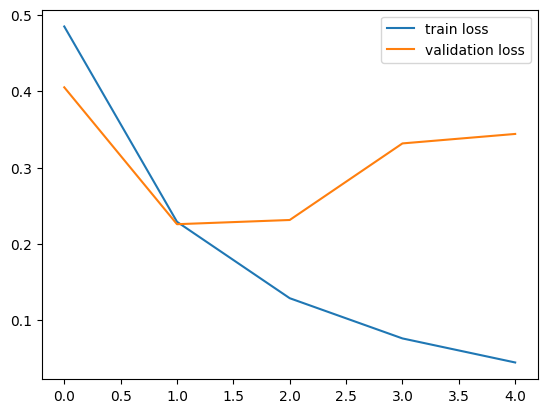

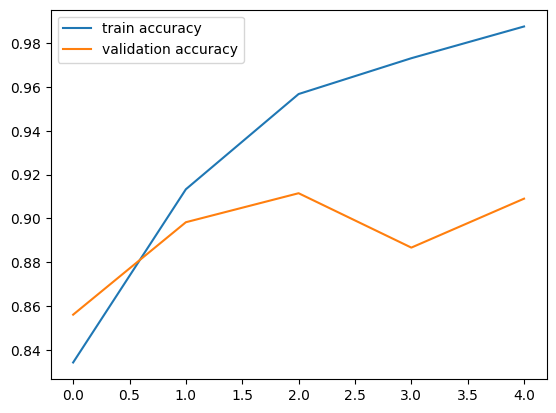

In [29]:
h = history

# plot the loss values

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy values

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Prediction System

Path of the image to predicted : /kaggle/input/datset-new/stop-civid-19-asian-man-wearing-face-mask-show-stop-hands-gesture-stop-corona-virus-outbreak-scaled.jpg


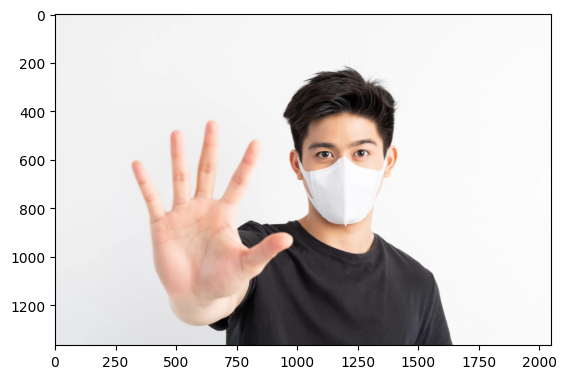

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.12871625 0.99352336]]
1
The person in the image wearing mask


In [32]:
input_image_path = input('Path of the image to predicted :')

input_image = cv2.imread(input_image_path)

input_image = cv2.imread(input_image_path)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label == 1:
    print('The person in the image wearing mask')
else:
    print('The person in the image nor wering mask')